In [108]:
# download the data
# the data can be found here: https://www.kaggle.com/datasets/mexwell/steamgames?resource=download
# can be also found here: https://lime-negative-badger-175.mypinata.cloud/ipfs/QmQDhADFRQmwnNR9sXy2R6YoQbXgLy1G7TFdntBpW64hxg
# download the data and put it in the data folder ../data/games.csv


## import and initial info

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('../data/games.csv')
print("The shape of the data is: ", data.shape)
print(data.head(5))

The shape of the data is:  (71716, 39)
     AppID                   Name  Release date Estimated owners  Peak CCU  \
0    20200       Galactic Bowling  Oct 21, 2008        0 - 20000         0   
1   655370           Train Bandit  Oct 12, 2017        0 - 20000         0   
2  1732930           Jolt Project  Nov 17, 2021        0 - 20000         0   
3  1355720               Henosis™  Jul 23, 2020        0 - 20000         0   
4  1139950  Two Weeks in Painland   Feb 3, 2020        0 - 20000         0   

   Required age  Price  DLC count  \
0             0  19.99          0   
1             0   0.99          0   
2             0   4.99          0   
3             0   5.99          0   
4             0   0.00          0   

                                      About the game  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   
2  Jolt Project: The army now has a new robotics ...   
3  HENOSIS™ is a mysterious 2D Platform Puzzl

In [2]:
import re

release_date = data['Release date']
regex=r"^(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)(?: \d{1,2},)? \d{4}$"
# regex = r"^(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec) \d{1,2}, \d{4}$"
cnt = 0
for val in release_date:
    if re.match(regex, val) is None:
        print(val)
        t = pd.to_datetime(val)
        print(t)
        cnt += 1

cnt

0

In [3]:
import re

webiste = data['Website']
regex = r"^(?:https?:\/\/)?(?:www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,32}\b(?:[-a-zA-Z0-9()@:%_\+.~#?&\/=]*)$"
cnt = 0
for val in webiste.dropna():
    val = val.replace(" ", "")
    val = val.replace("amp;", "")
    
    if re.match(regex, val) is None:
        cnt += 1

cnt

67

In [4]:
print("\nSummary of the dataset:")
print(data.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71716 entries, 0 to 71715
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       71716 non-null  int64  
 1   Name                        71715 non-null  object 
 2   Release date                71716 non-null  object 
 3   Estimated owners            71716 non-null  object 
 4   Peak CCU                    71716 non-null  int64  
 5   Required age                71716 non-null  int64  
 6   Price                       71716 non-null  float64
 7   DLC count                   71716 non-null  int64  
 8   About the game              69280 non-null  object 
 9   Supported languages         71716 non-null  object 
 10  Full audio languages        71716 non-null  object 
 11  Reviews                     9167 non-null   object 
 12  Header image                71716 non-null  object 
 13  Websit

In [5]:
print("\nDescriptive statistics of the dataset:")
print(data.describe())


Descriptive statistics of the dataset:
              AppID       Peak CCU  Required age         Price     DLC count  \
count  7.171600e+04   71716.000000  71716.000000  71716.000000  71716.000000   
mean   1.199222e+06     140.761197      0.343494      7.223055      0.615386   
std    5.982238e+05    5797.005513      2.362128     11.072051     14.932853   
min    1.000000e+01       0.000000      0.000000      0.000000      0.000000   
25%    7.005350e+05       0.000000      0.000000      0.990000      0.000000   
50%    1.176745e+06       0.000000      0.000000      4.990000      0.000000   
75%    1.692255e+06       1.000000      0.000000      9.990000      0.000000   
max    2.379920e+06  872138.000000     21.000000    999.000000   2366.000000   

       Metacritic score    User score      Positive       Negative  \
count      71716.000000  71716.000000  7.171600e+04   71716.000000   
mean           3.834207      0.044969  1.114753e+03     182.115525   
std           16.437707      

In [6]:
# Identify missing values
missing_values = data.isnull().sum()
print("\nNumber of missing values in each column:")
print(missing_values)


Number of missing values in each column:
AppID                             0
Name                              1
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 2436
Supported languages               0
Full audio languages              0
Reviews                       62549
Header image                      0
Website                       36643
Support url                   35462
Support email                 11118
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                67938
User score                        0
Positive                          0
Negative                          0
Score rank                    71674
Achievements                      0
Recommendations       

In [7]:
# show the columns with missing values
missing_columns = data.columns[data.isnull().any()]
print("\nColumns with missing values:")
print(missing_columns)


Columns with missing values:
Index(['Name', 'About the game', 'Reviews', 'Website', 'Support url',
       'Support email', 'Metacritic url', 'Score rank', 'Notes', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')


In [8]:
missing_values = data.isnull().sum().sum()
print(missing_values)


380486


In [9]:
data.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [9]:
# show the number of unique value per column
unique_values = data.nunique()
print("\nNumber of unique values in each column:")
print(unique_values)


Number of unique values in each column:
AppID                         71716
Name                          71170
Release date                   4170
Estimated owners                 14
Peak CCU                       1298
Required age                     17
Price                           515
DLC count                        94
About the game                68942
Supported languages            9663
Full audio languages           1935
Reviews                        9074
Header image                  71612
Website                       28855
Support url                   23996
Support email                 35872
Windows                           2
Mac                               2
Linux                             2
Metacritic score                 73
Metacritic url                 3683
User score                       32
Positive                       4414
Negative                       2237
Score rank                        4
Achievements                    423
Recommendations        

## To be cleaned

What data features need to be cleaned:

Based on the insights of the previous cells, we need to perform many steps for cleaning the data. The data contains 380519 missing value. Some columns are not needed as they are and we may change their format to include them in the ML steps. For example, Support email column is not needed as a string, but it would be beneficial to have whether an app has a support email or not for the prediction of the rating. Same goes for Support url, Website. 

We also need to transform some columns:
About the game, Reviews, Notes are text that is describing the games. We may encode the text or extract features of the games depending on the text.

Genres, Tags, Categories, Supported languages, Full audio languages are given by a list. We have to collect all items of these columns, possibly remove some similar ones, and finally use each genre as a categorical feature with yes or no. List of strings.

Developers/Publishers are the companies behind the application. String.

Movies columns contains a link to a video showing some details of the game like the gameplay. It is possible to extract some features from the video to help assess the game quality. However, the process is rather complicated. String.

Screenshots columns is a link to some images taken from the applications. It is possible to extract some features from the video to help assess the game quality. However, the process is rather complicated. String.

Metacritic is a website that aggregates reviews of films, television shows, music albums, video games, and formerly books. Metacritic url (stirng) of the application is also provided. We can use scrape the review from the website. Metacritic score (number) is also given. 

AppID is a number to identify an application. Number.

Name is the name of the application. String.

Release date is a date of the format: Oct 21, 2008. Date.

Estimated owners is estimated number of people who have purchased the application (possibly for free). Number.

Peak CCU Peak Total number of users. Number.

Required age. Number.

Price. Number.

DLC count. Number.

Header image. Url. 

User score the score of the game. Values range between 0 anf 100. Number.

Windows, Linux, Mac indicate whether the application can run on the given OS. Binary.

Negative, Positive are the number of negative and positive rating, respectively. Number.

Recommendations is the number of recommendations. Number.

Average playtime two weeks. The suggested target. Number.

Average playtime forever. Not used to avoid data leakage. Number.

Median playtime forever. Not used to avoid data leakage. Number. 

Median playtime two weeks. Not used to avoid data leakage. Number.

Achievements is the the number of achievements inside the application. Number.

Possible transform strategies

DROP
- drop Header image (it's just a link to the game's image)
- drop Score rank. It has 71674 null values (out of 71716!).
- probably drop Developers (too many unique values 42615). We can also transform these features to has_experienced_developer (more than 50 games)
- probably drop Publishers (too many unique values 36815). We can also transform these features to has_experienced_publisher (more than 50 games)
- probably drop Screenshots.
- drop AppID
- drop Name

TRANSFORM
- transform Website to has_website
- tranform Support url to has_support_url
- transform Support email to has_support_email
- transform Metacritic url to has_metacritic_url
- transform Categories (unique vals = 40) using one hot encoding and fill missing values (3407).
- transform Genres (unique vals = 30) using one hot encoding and fill missing values (2439).
- transform Tags (unique vals = 446) using one hot encoding and fill missing values (14014). Or maybe not. Just ignore it.
- tranform Movies to num_movies (not sure though. These are NOT actual movies. They are trailers. So, maybe we can ignore this feature.)
- Supported languages (unique = 134) one hot encoding
- Full audio languages (unique = 121) one hot encoding

KEEP
- Price
- Required age
- Release date
- Metacritic score 
- Achievements


ALL BELOW ARE TEXT
- transform About the game to something
- tranform Reviews to something
- transform Notes to something

TARGET
- choose one of the ones below and drop the rest to avoid data leakage
- Average playtime forever          
- Average playtime two weeks        
- Median playtime forever           
- Median playtime two weeks   

(but problably drop because leakage)
- Estimated owners is of the format (%d - %d)
- Peak CCU
- User score
- Positive
- Negative
- Recommendations
      

In [10]:
# find the features which are binary, i.e. have only 2 unique values
binary_feats = []
for col in data.columns:
    if data[col].nunique() == 2:
        binary_feats.append(col)
        # print(col, df[col].nunique())
        # get the list of unique values
        unique_vals = sorted(list(data[col].unique()))
        if unique_vals[0] != 0 or unique_vals[1] != 1:
            print(col, unique_vals)
        
print(binary_feats)

['Windows', 'Mac', 'Linux']


In [11]:
# Detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
outliers = {column: detect_outliers(data, column) for column in numeric_columns}

print("\nOutliers in the dataset according to IQR method:")
for column, outliers_df in outliers.items():
    if not outliers_df.empty:
        print(f"\nOutliers in {column}: {outliers_df.shape[0]}")



Outliers in the dataset according to IQR method:

Outliers in Peak CCU: 11069

Outliers in Required age: 1516

Outliers in Price: 3352

Outliers in DLC count: 10850

Outliers in Metacritic score: 3778

Outliers in User score: 42

Outliers in Positive: 12095

Outliers in Negative: 11455

Outliers in Achievements: 4968

Outliers in Recommendations: 12830

Outliers in Average playtime forever: 14356

Outliers in Average playtime two weeks: 1855

Outliers in Median playtime forever: 14356

Outliers in Median playtime two weeks: 1855


Columns with the most outliers:
['Average playtime forever', 'Median playtime forever', 'Recommendations', 'Positive', 'Negative', 'Peak CCU', 'DLC count', 'Achievements', 'Metacritic score', 'Price', 'Average playtime two weeks', 'Median playtime two weeks', 'Required age', 'User score']


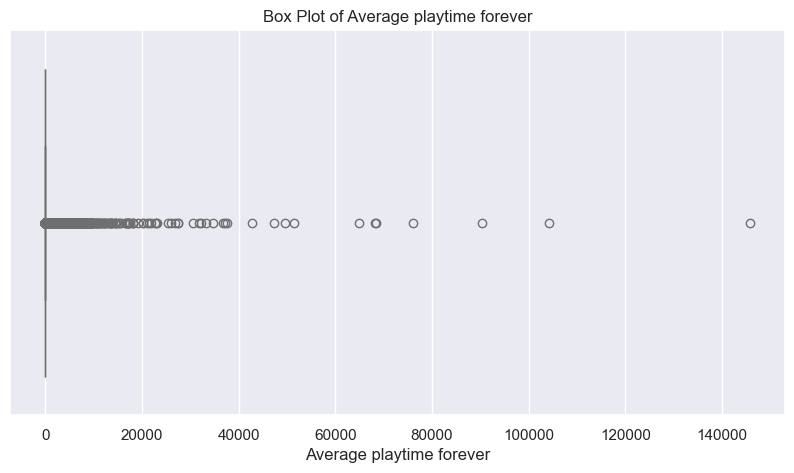

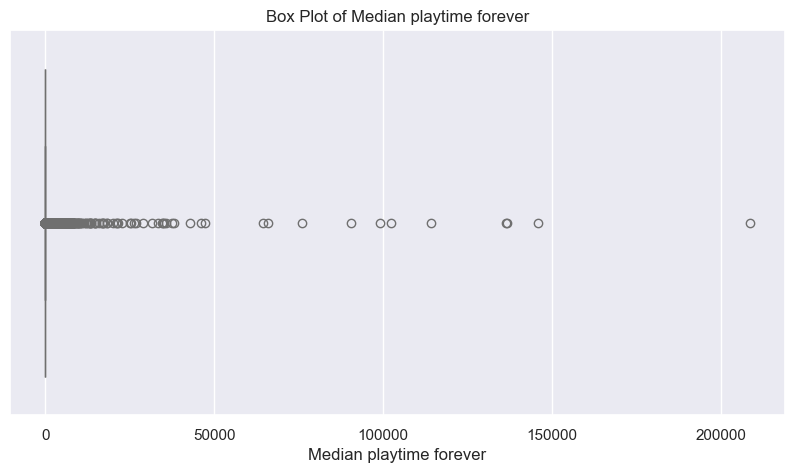

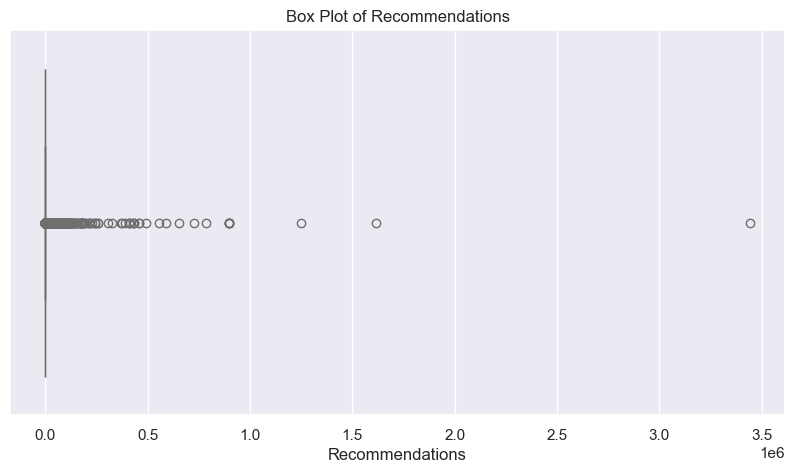

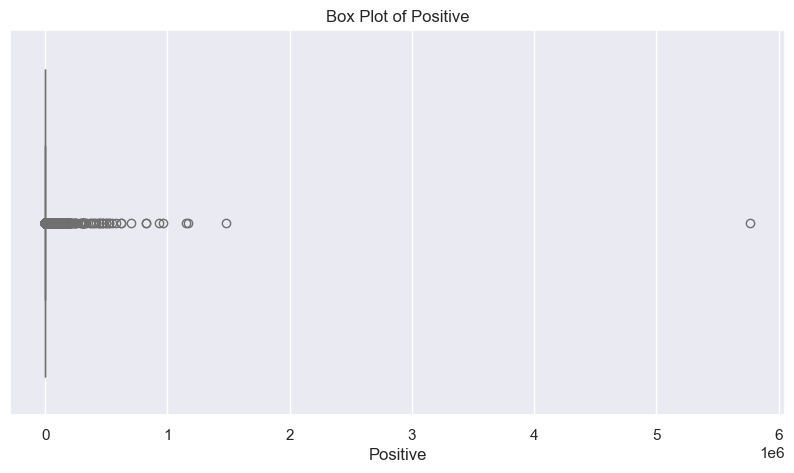

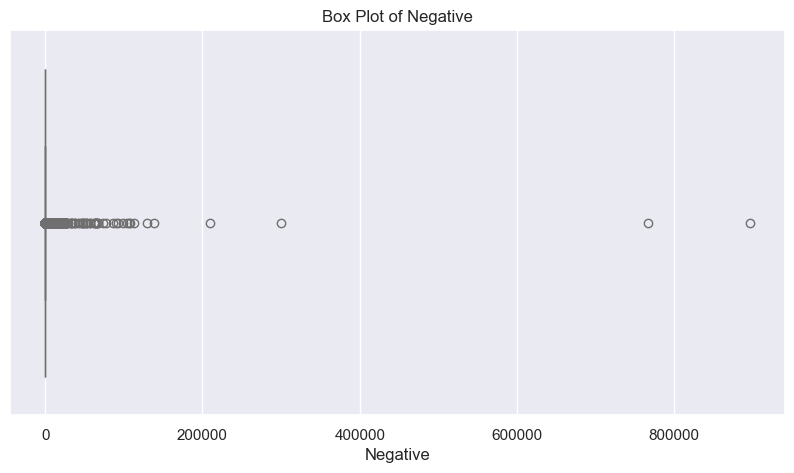

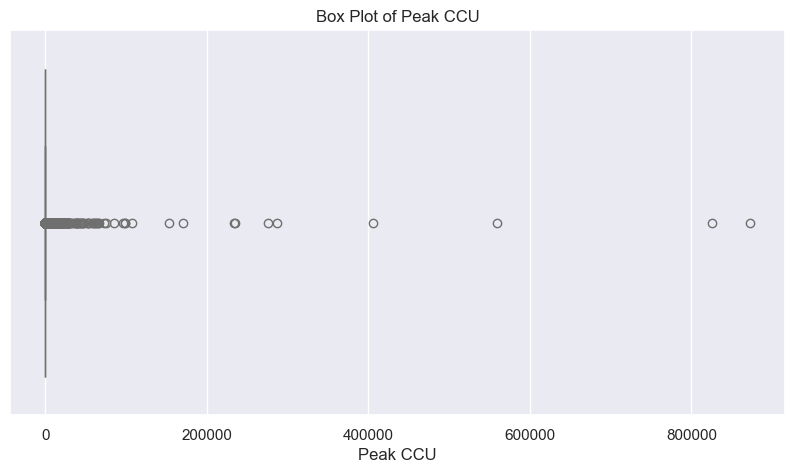

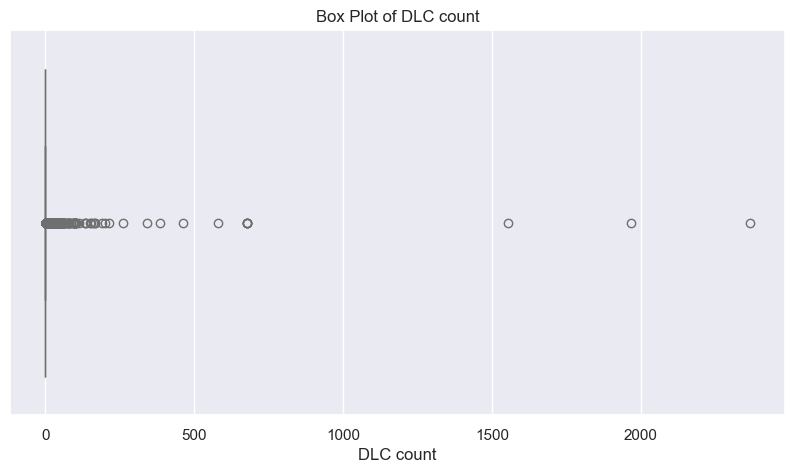

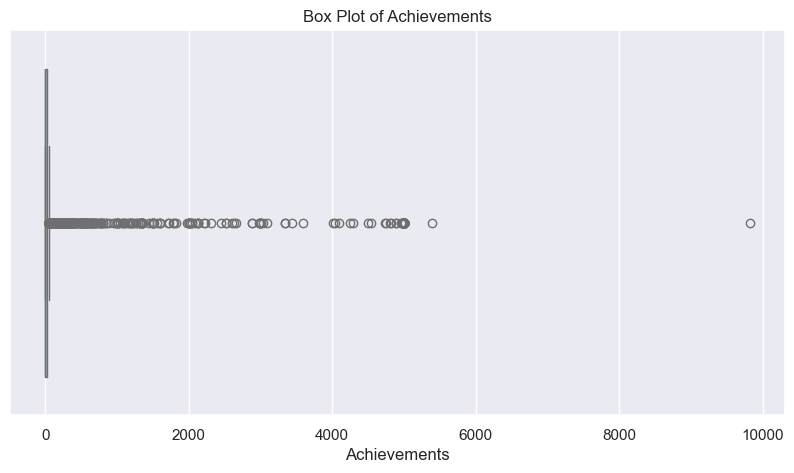

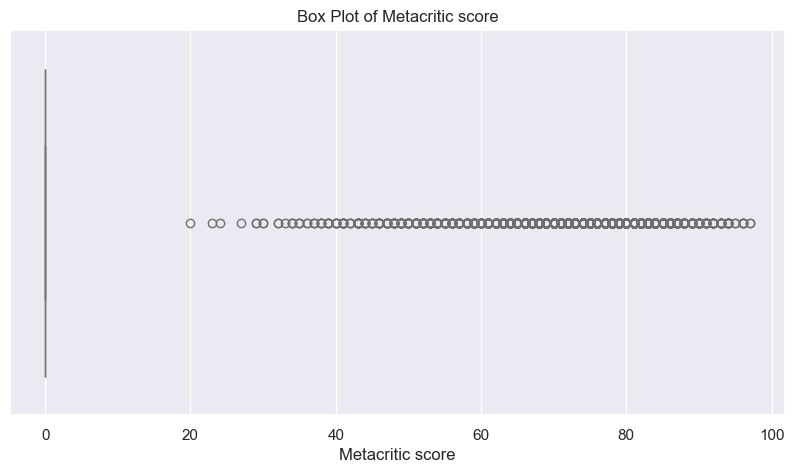

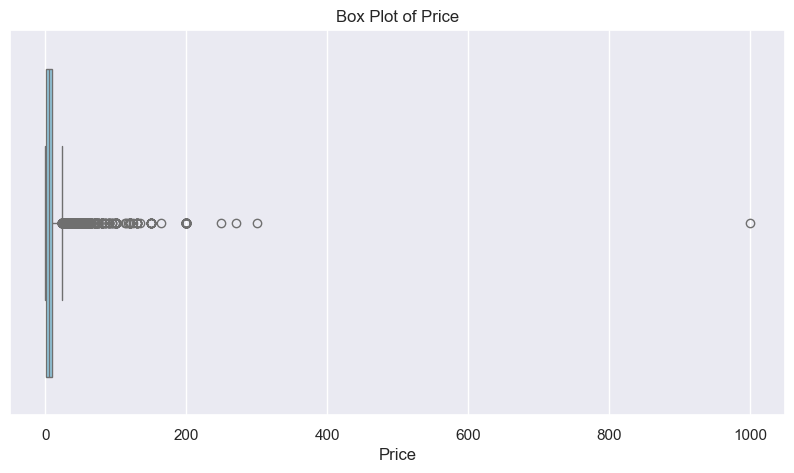

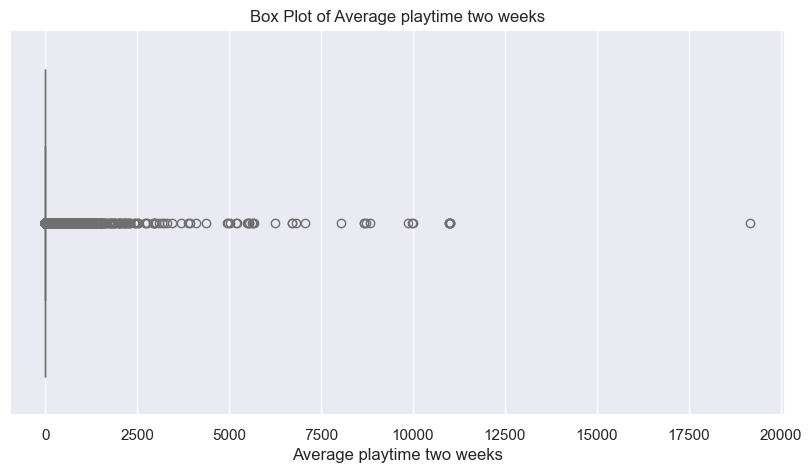

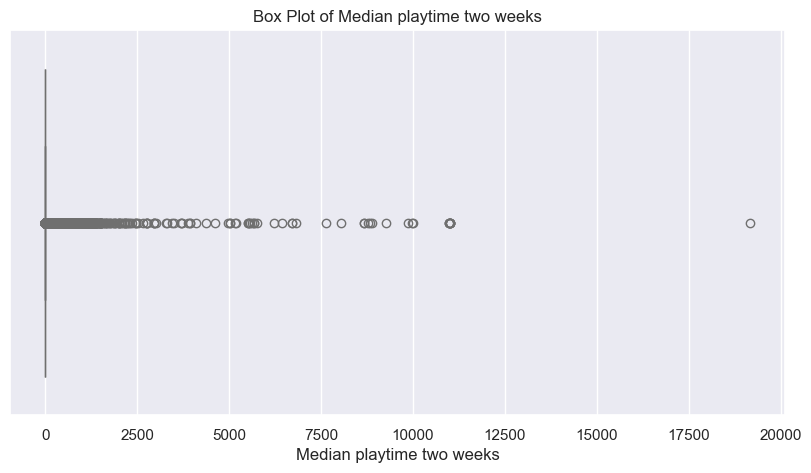

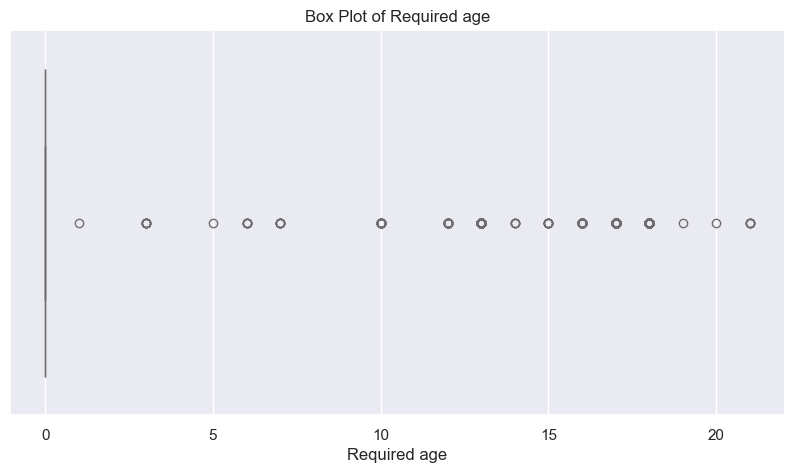

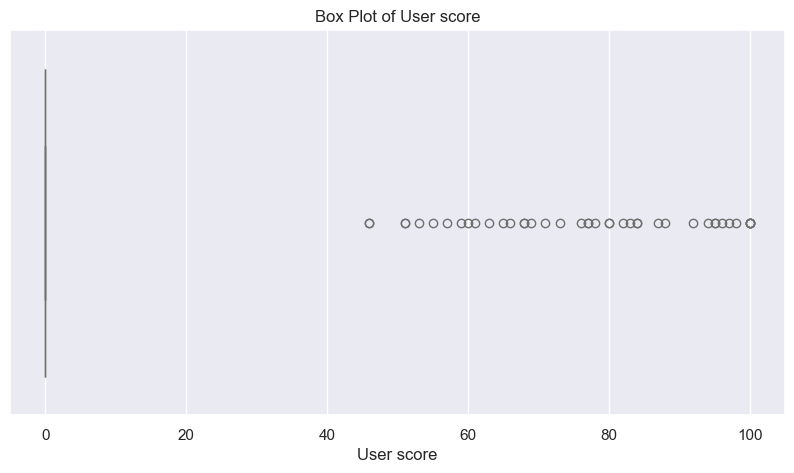

In [12]:

# Set a seaborn theme
sns.set_theme(style="darkgrid")

# Detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Find columns with the most outliers
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = {column: detect_outliers(data, column).shape[0] for column in numeric_columns}
sorted_outlier_counts = sorted(outlier_counts.items(), key=lambda item: item[1], reverse=True)
most_outliers_columns = [item[0] for item in sorted_outlier_counts if item[1] > 0]

print("Columns with the most outliers:")
print(most_outliers_columns)

# Plot box plots of columns with the most outliers
for column in most_outliers_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

## Univariate graphs

<Axes: xlabel='Average playtime two weeks', ylabel='Count'>

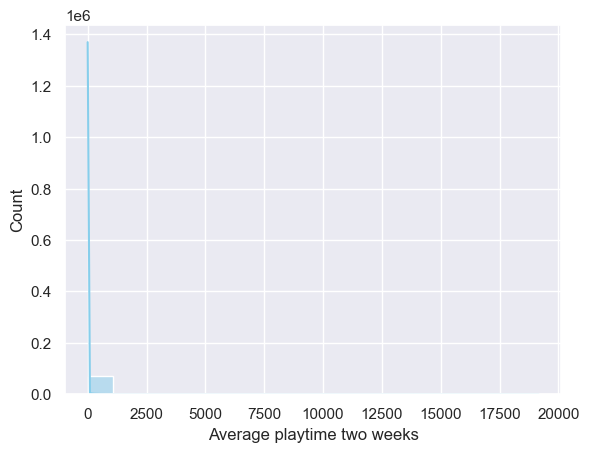

In [13]:
sns.histplot(data['Average playtime two weeks'].dropna(), kde=True, color='skyblue')

In [14]:
data.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [15]:
cols_to_plot = ['Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count',
       'Windows',
       'Mac', 'Linux', 'Metacritic score',  'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', ]


df_to_plot = data[cols_to_plot]
# todo Release date
# maybe About the game,  'Reviews', 'Notes',
# 'Supported languages', 'Full audio languages', 'Categories', 'Genres', 'Tags',
# 'Screenshots', 'Movies'

In [16]:
import gc
gc.collect()

19505

Estimated owners


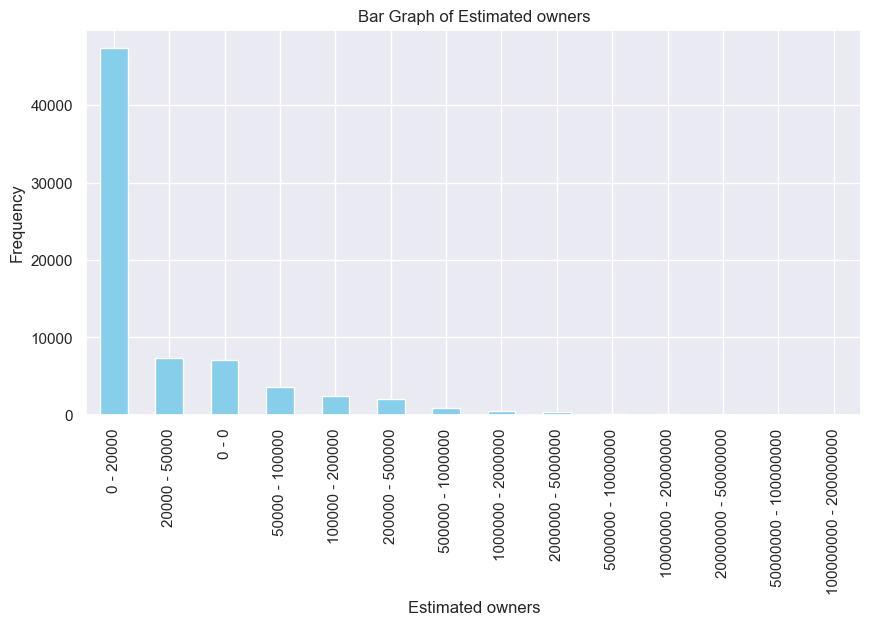

Peak CCU


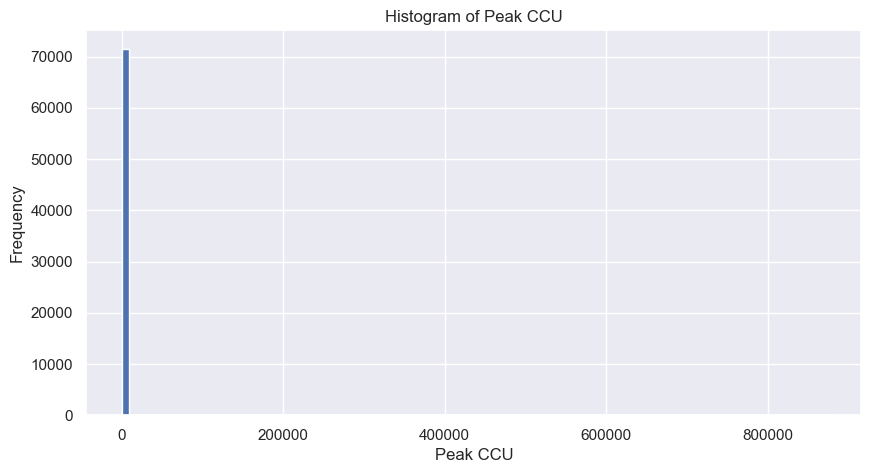

Required age


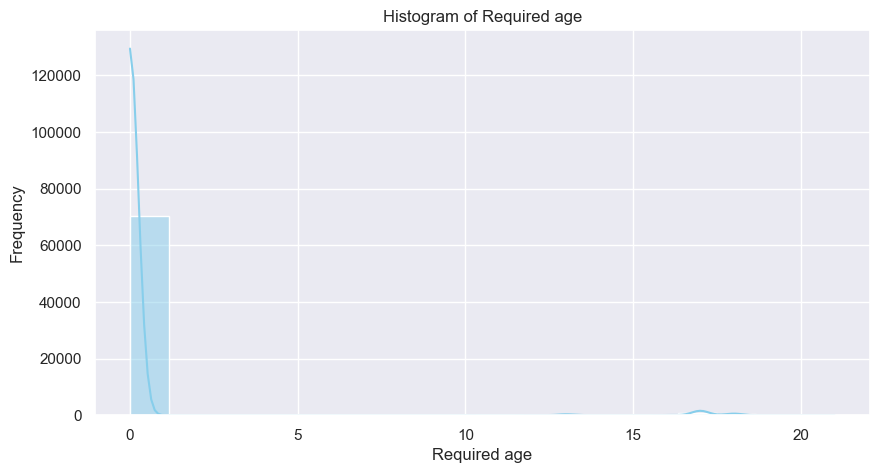

Price


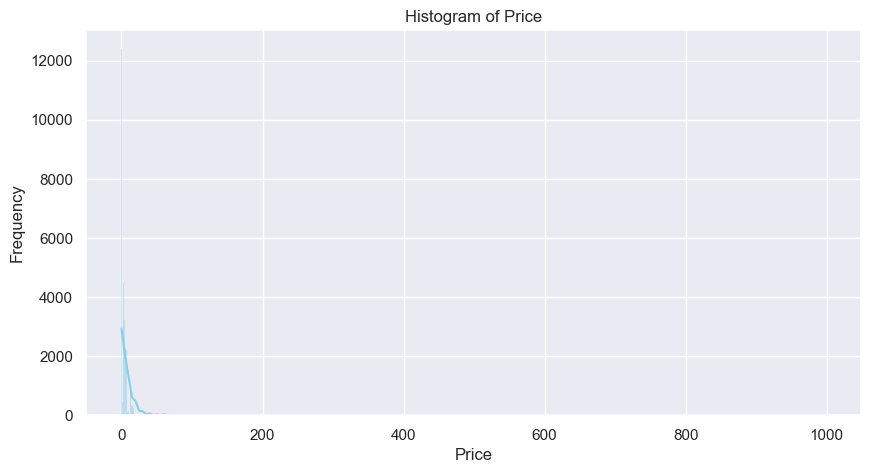

DLC count


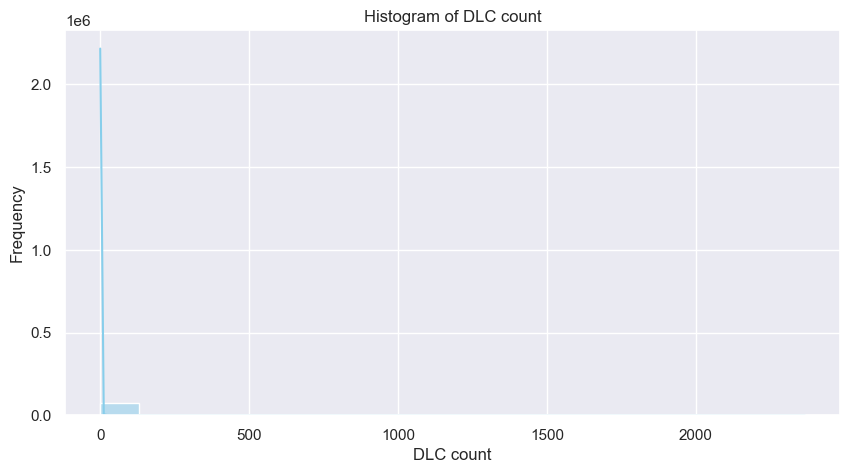

Windows


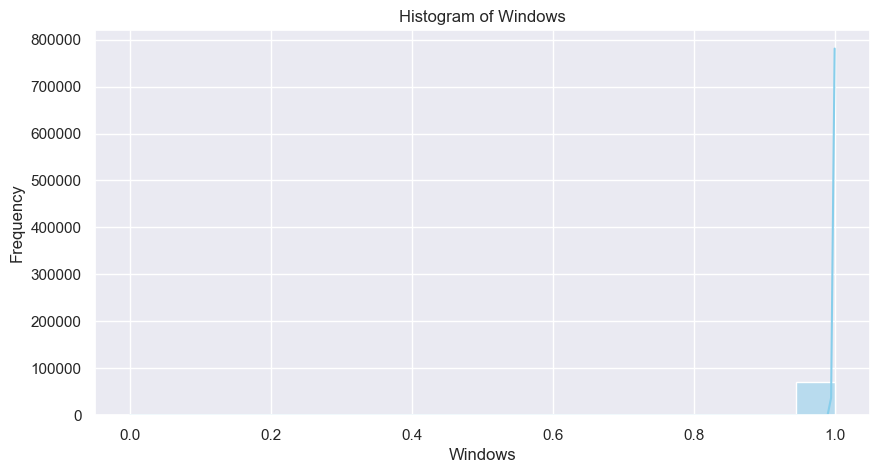

Mac


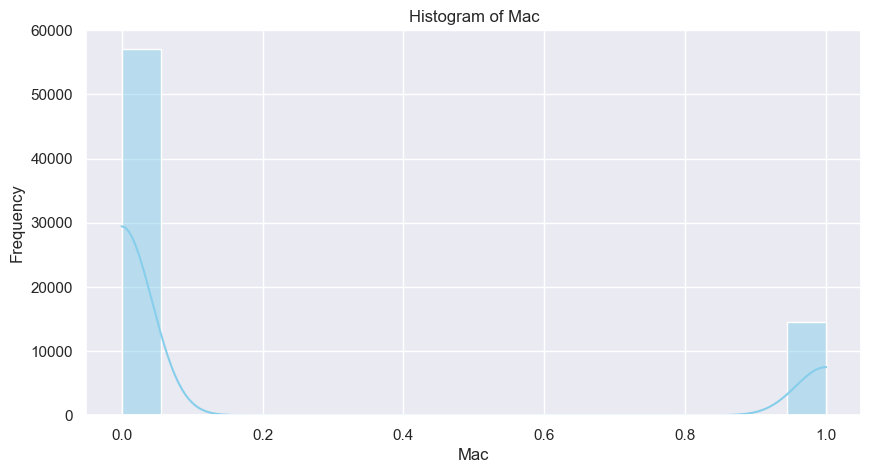

Linux


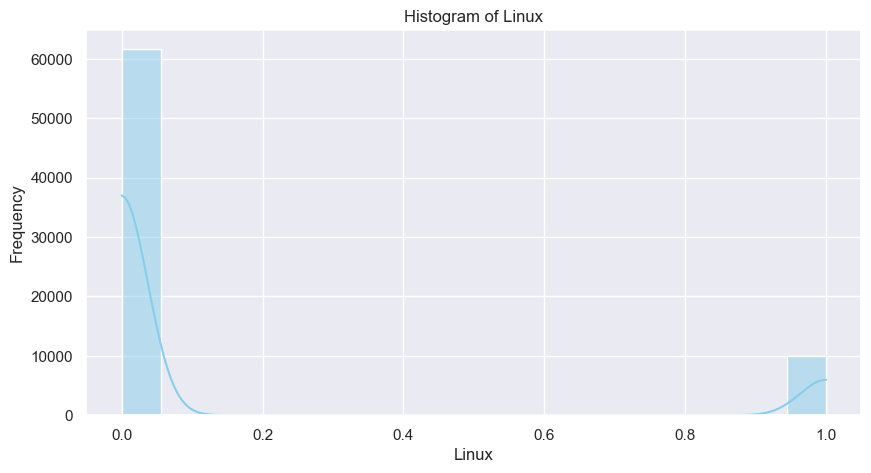

Metacritic score


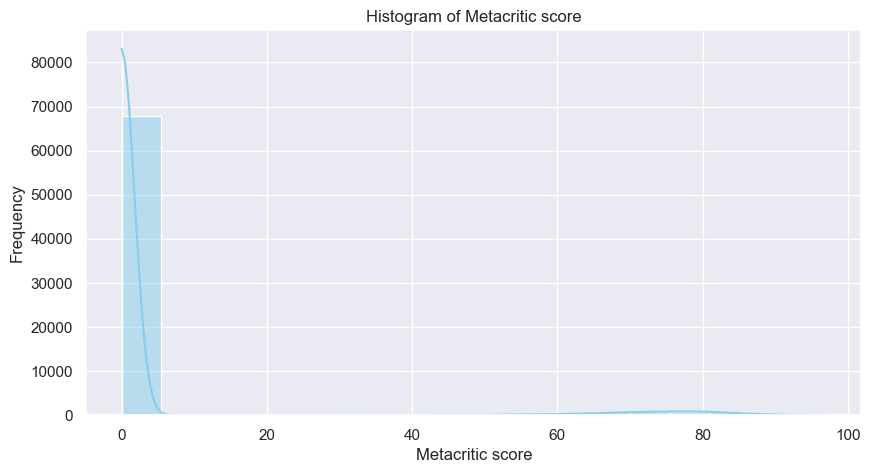

User score


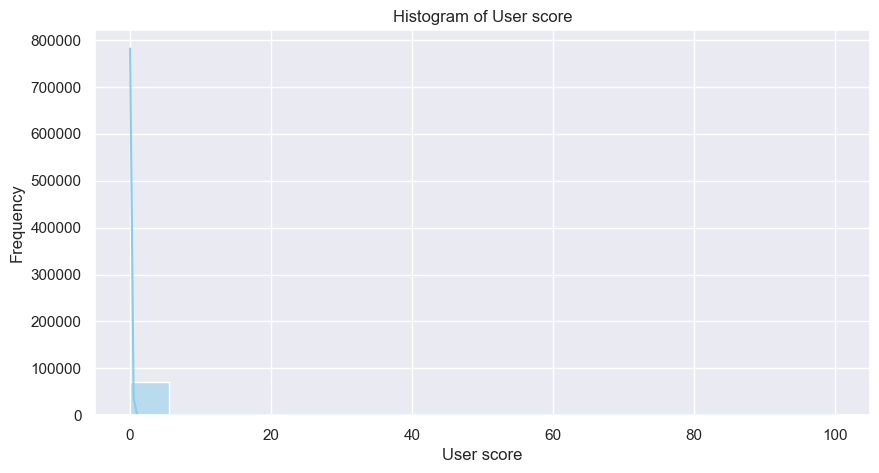

Positive


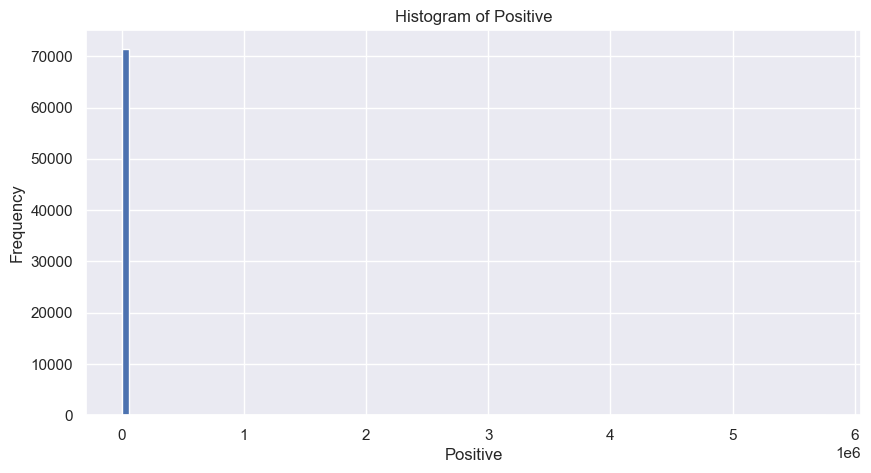

Negative


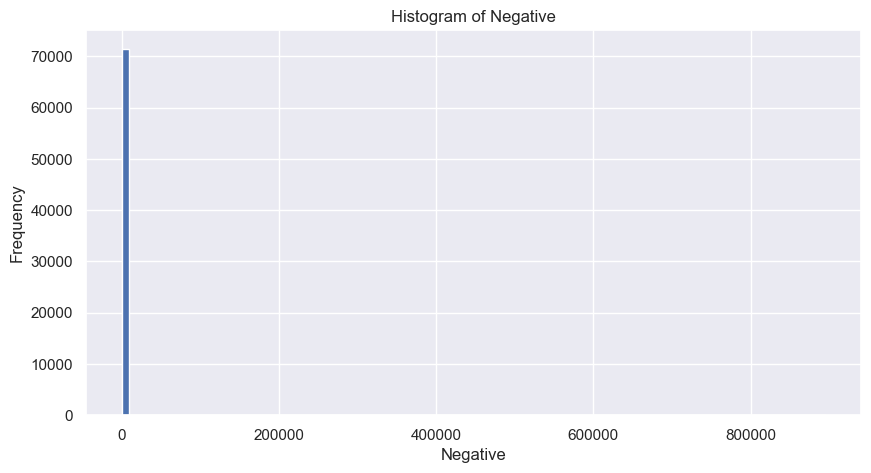

Score rank


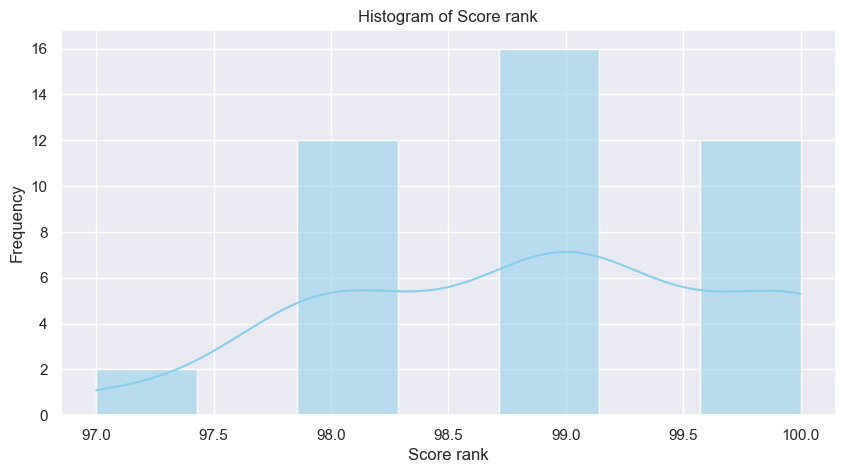

Achievements


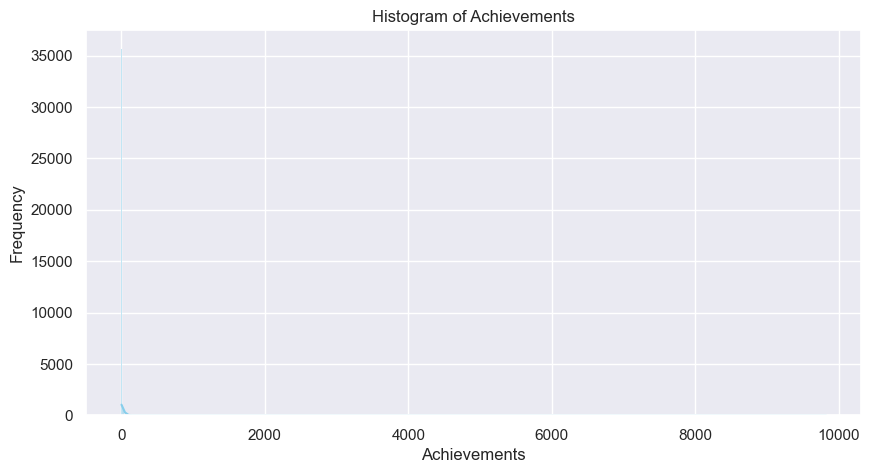

Recommendations


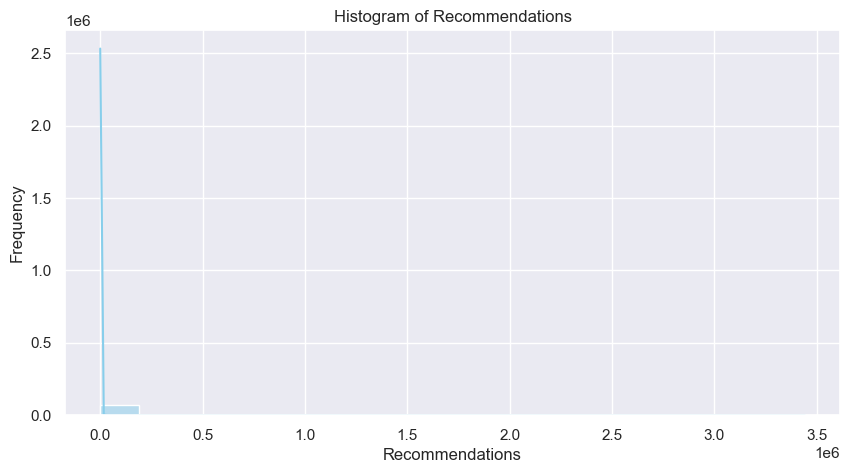

Average playtime forever


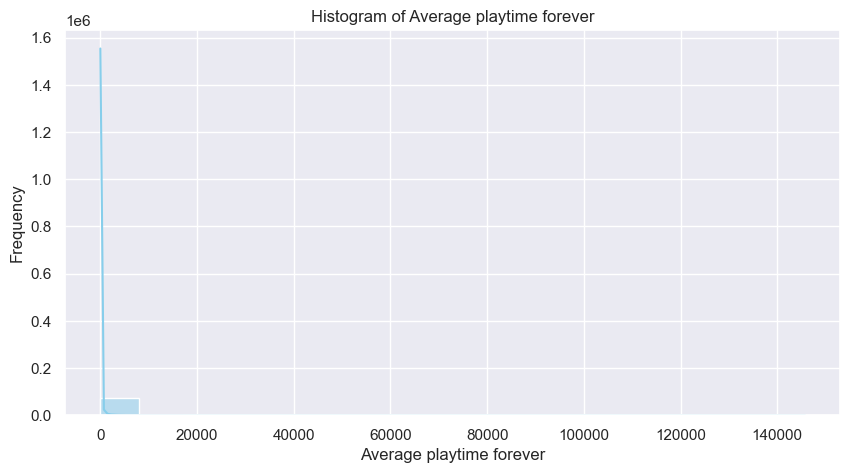

Average playtime two weeks


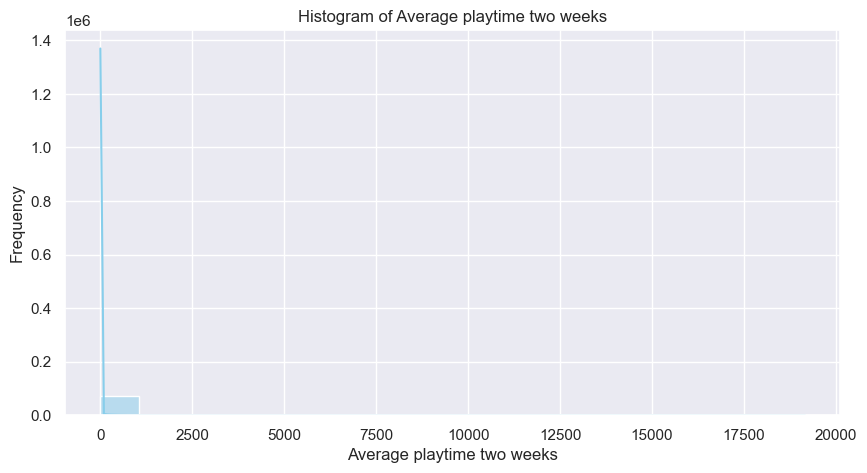

Median playtime forever


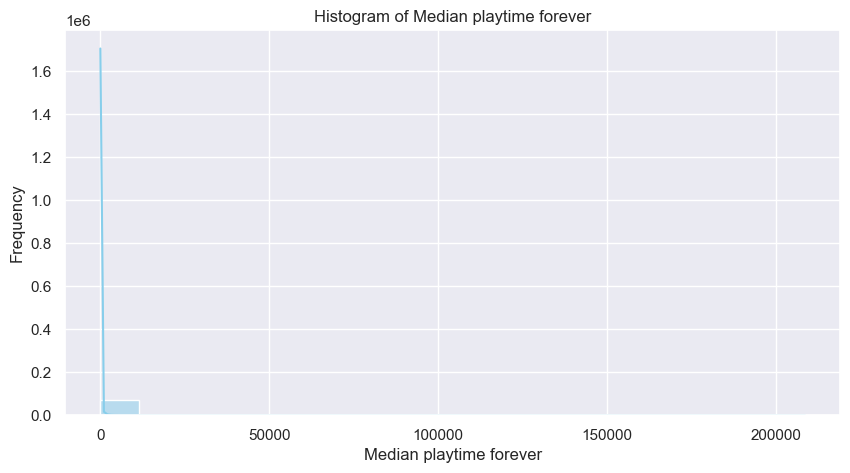

Median playtime two weeks


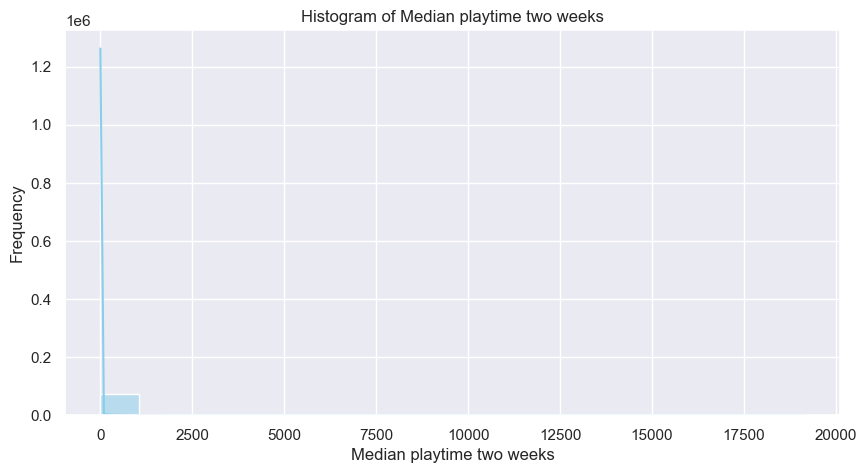

In [17]:

# Set a seaborn theme
sns.set_theme(style="darkgrid")

# Function to plot univariate graphs
def plot_univariate(df):
    for column in df.columns:
        gc.collect()
        # if column == 'Peak CCU':
        #     continue
        print(column)
        plt.figure(figsize=(10, 5))
        if pd.api.types.is_numeric_dtype(df[column]):
            if column == 'Peak CCU' or column == 'Positive' or column == 'Negative':
                data[column].dropna().hist(bins=100)
            else:
                sns.histplot(df[column].dropna(), kde=True, color='skyblue')
            plt.title(f'Histogram of {column}')
        else:
            df[column].value_counts().plot(kind='bar', color='skyblue')
            plt.title(f'Bar Graph of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Plot univariate graphs
# get first 5 columns
# data0_5 = data.iloc[:, 0:5]
plot_univariate(df_to_plot)

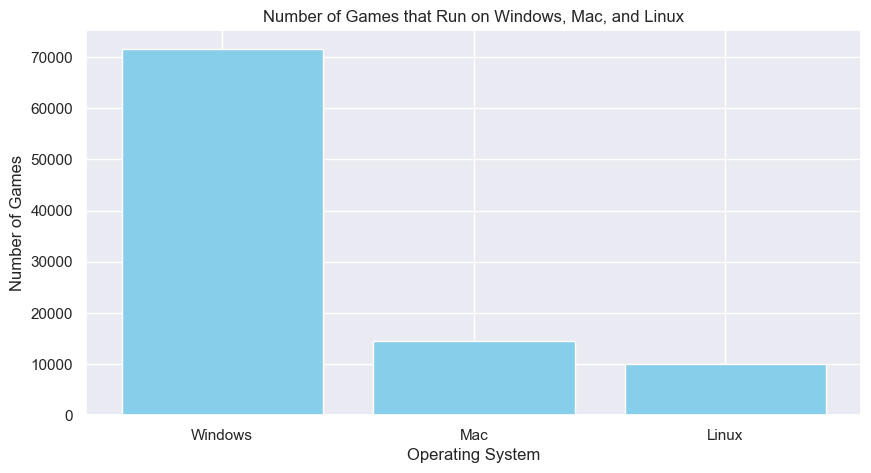

In [18]:
# find the number of games that run on Windows, Mac, and Linux
windows = data['Windows'].sum()
mac = data['Mac'].sum()
linux = data['Linux'].sum()

# bar plot
plt.figure(figsize=(10, 5))
plt.bar(['Windows', 'Mac', 'Linux'], [windows, mac, linux], color='skyblue')
plt.title('Number of Games that Run on Windows, Mac, and Linux')
plt.xlabel('Operating System')
plt.ylabel('Number of Games')
plt.show()

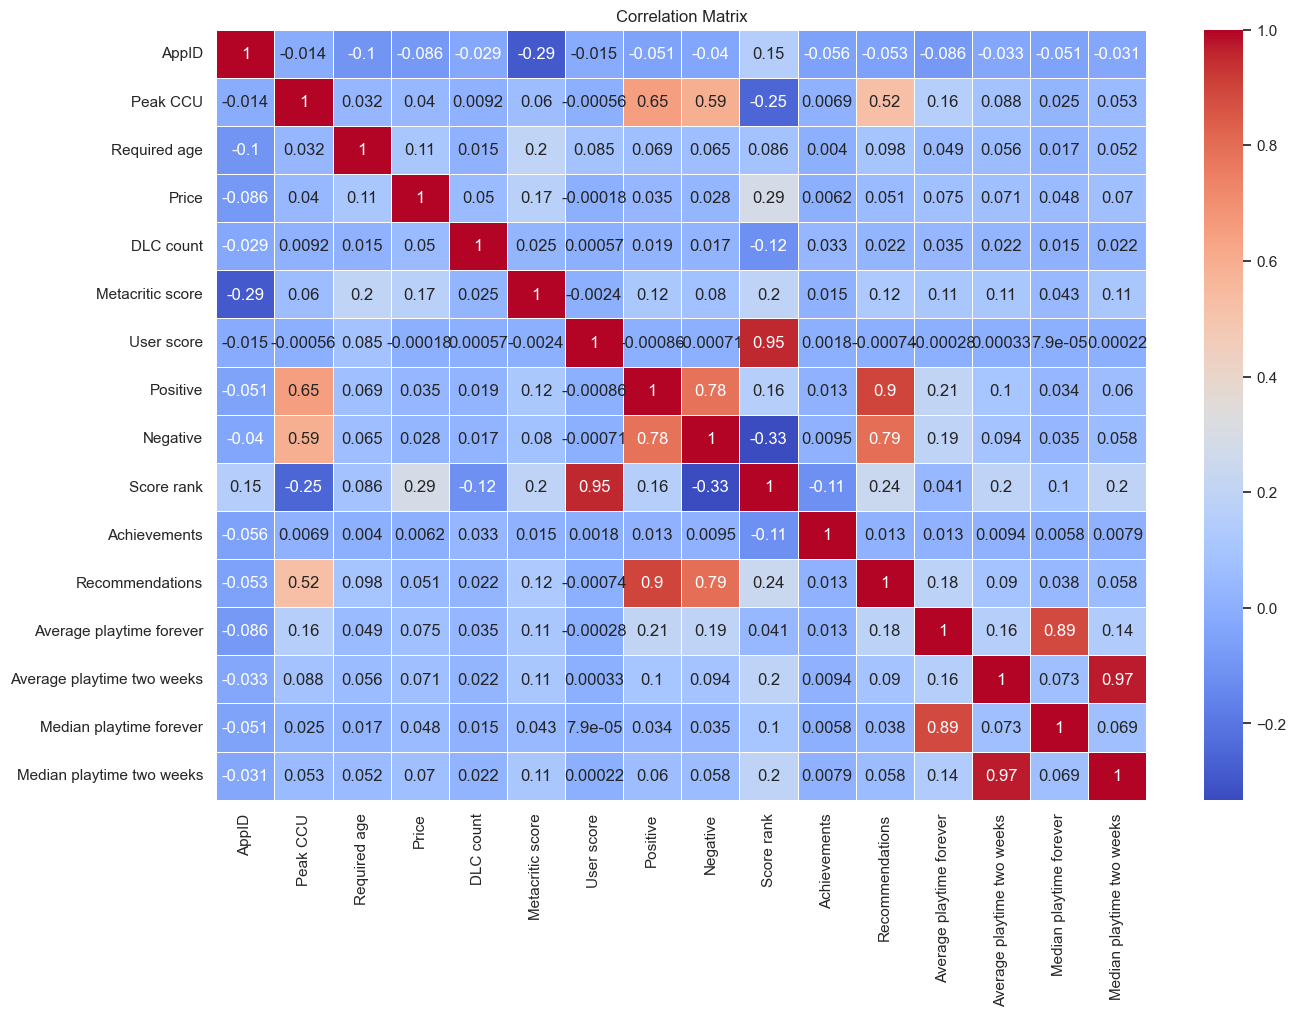

In [19]:
# Correlation matrix
# keep only the numeric columns
data_numeric = data[numeric_columns]
correlation_matrix = data_numeric.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [20]:
# find the columns that are most correlated with the target column (User score)
correlation_with_target = correlation_matrix['Price'].sort_values(key=lambda x: abs(x), ascending=False)
print("Correlation of columns with Average playtime two weeks:")
print(correlation_with_target)


Correlation of columns with Average playtime two weeks:
Price                         1.000000
Score rank                    0.288778
Metacritic score              0.171242
Required age                  0.111189
AppID                        -0.086032
Average playtime forever      0.074795
Average playtime two weeks    0.071032
Median playtime two weeks     0.069886
Recommendations               0.050520
DLC count                     0.050423
Median playtime forever       0.048141
Peak CCU                      0.039669
Positive                      0.034613
Negative                      0.028402
Achievements                  0.006157
User score                   -0.000177
Name: Price, dtype: float64


In [22]:
# find the columns that are most correlated with the target column (User score)
correlation_with_target = correlation_matrix['Average playtime two weeks'].sort_values(key=lambda x: abs(x), ascending=False)
print("Correlation of columns with Average playtime two weeks:")
print(correlation_with_target)


Correlation of columns with Average playtime two weeks:
Average playtime two weeks    1.000000
Median playtime two weeks     0.972367
Score rank                    0.197136
Average playtime forever      0.157629
Metacritic score              0.109524
Positive                      0.100038
Negative                      0.094324
Recommendations               0.089880
Peak CCU                      0.087989
Median playtime forever       0.072781
Price                         0.071032
Required age                  0.055594
AppID                        -0.032728
DLC count                     0.022246
Achievements                  0.009384
User score                    0.000335
Name: Average playtime two weeks, dtype: float64


We note that the target is highly correlated with Median playtime two weeks. This column should be dropped because it causes data leakage. The same goes for Average playtime forever, Median playtime forever. Other than that, Score rank and Metacritic score are the columns which are most correlated related with the target with values 0.12, 0.11 respectively. 

In [23]:

# Find the top 5 pairs of features with the highest correlations
correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
# Remove self correlations
correlation_pairs = correlation_pairs[correlation_pairs < 1.0]
top_5_pairs = correlation_pairs.head(10)  # Get the top 10 values (5 pairs)

print("Top 5 pairs of features with the highest correlations:")
print(top_5_pairs)

# Plot heatmap of top 5 correlated features
top_5_features = list([idx for pair in top_5_pairs.index for idx in pair])
top_5_corr_matrix = data[top_5_features].corr()



Top 5 pairs of features with the highest correlations:
Median playtime two weeks   Average playtime two weeks    0.972367
Average playtime two weeks  Median playtime two weeks     0.972367
Score rank                  User score                    0.953469
User score                  Score rank                    0.953469
Positive                    Recommendations               0.896500
Recommendations             Positive                      0.896500
Median playtime forever     Average playtime forever      0.890648
Average playtime forever    Median playtime forever       0.890648
Negative                    Recommendations               0.793208
Recommendations             Negative                      0.793208
dtype: float64


/Users/mohammadshahin/uni/ms1-t3/mlops/project/mlops-sum24-project/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/mohammadshahin/uni/ms1-t3/mlops/project/mlops-sum24-project/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/mohammadshahin/uni/ms1-t3/mlops/project/mlops-sum24-project/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/mohammadshahin/uni/ms1-t3/mlops/project/mlops-sum24-project/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/mohammadshahin/uni/ms1-t3/mlops/project/mlops-sum

<Figure size 1500x1000 with 0 Axes>

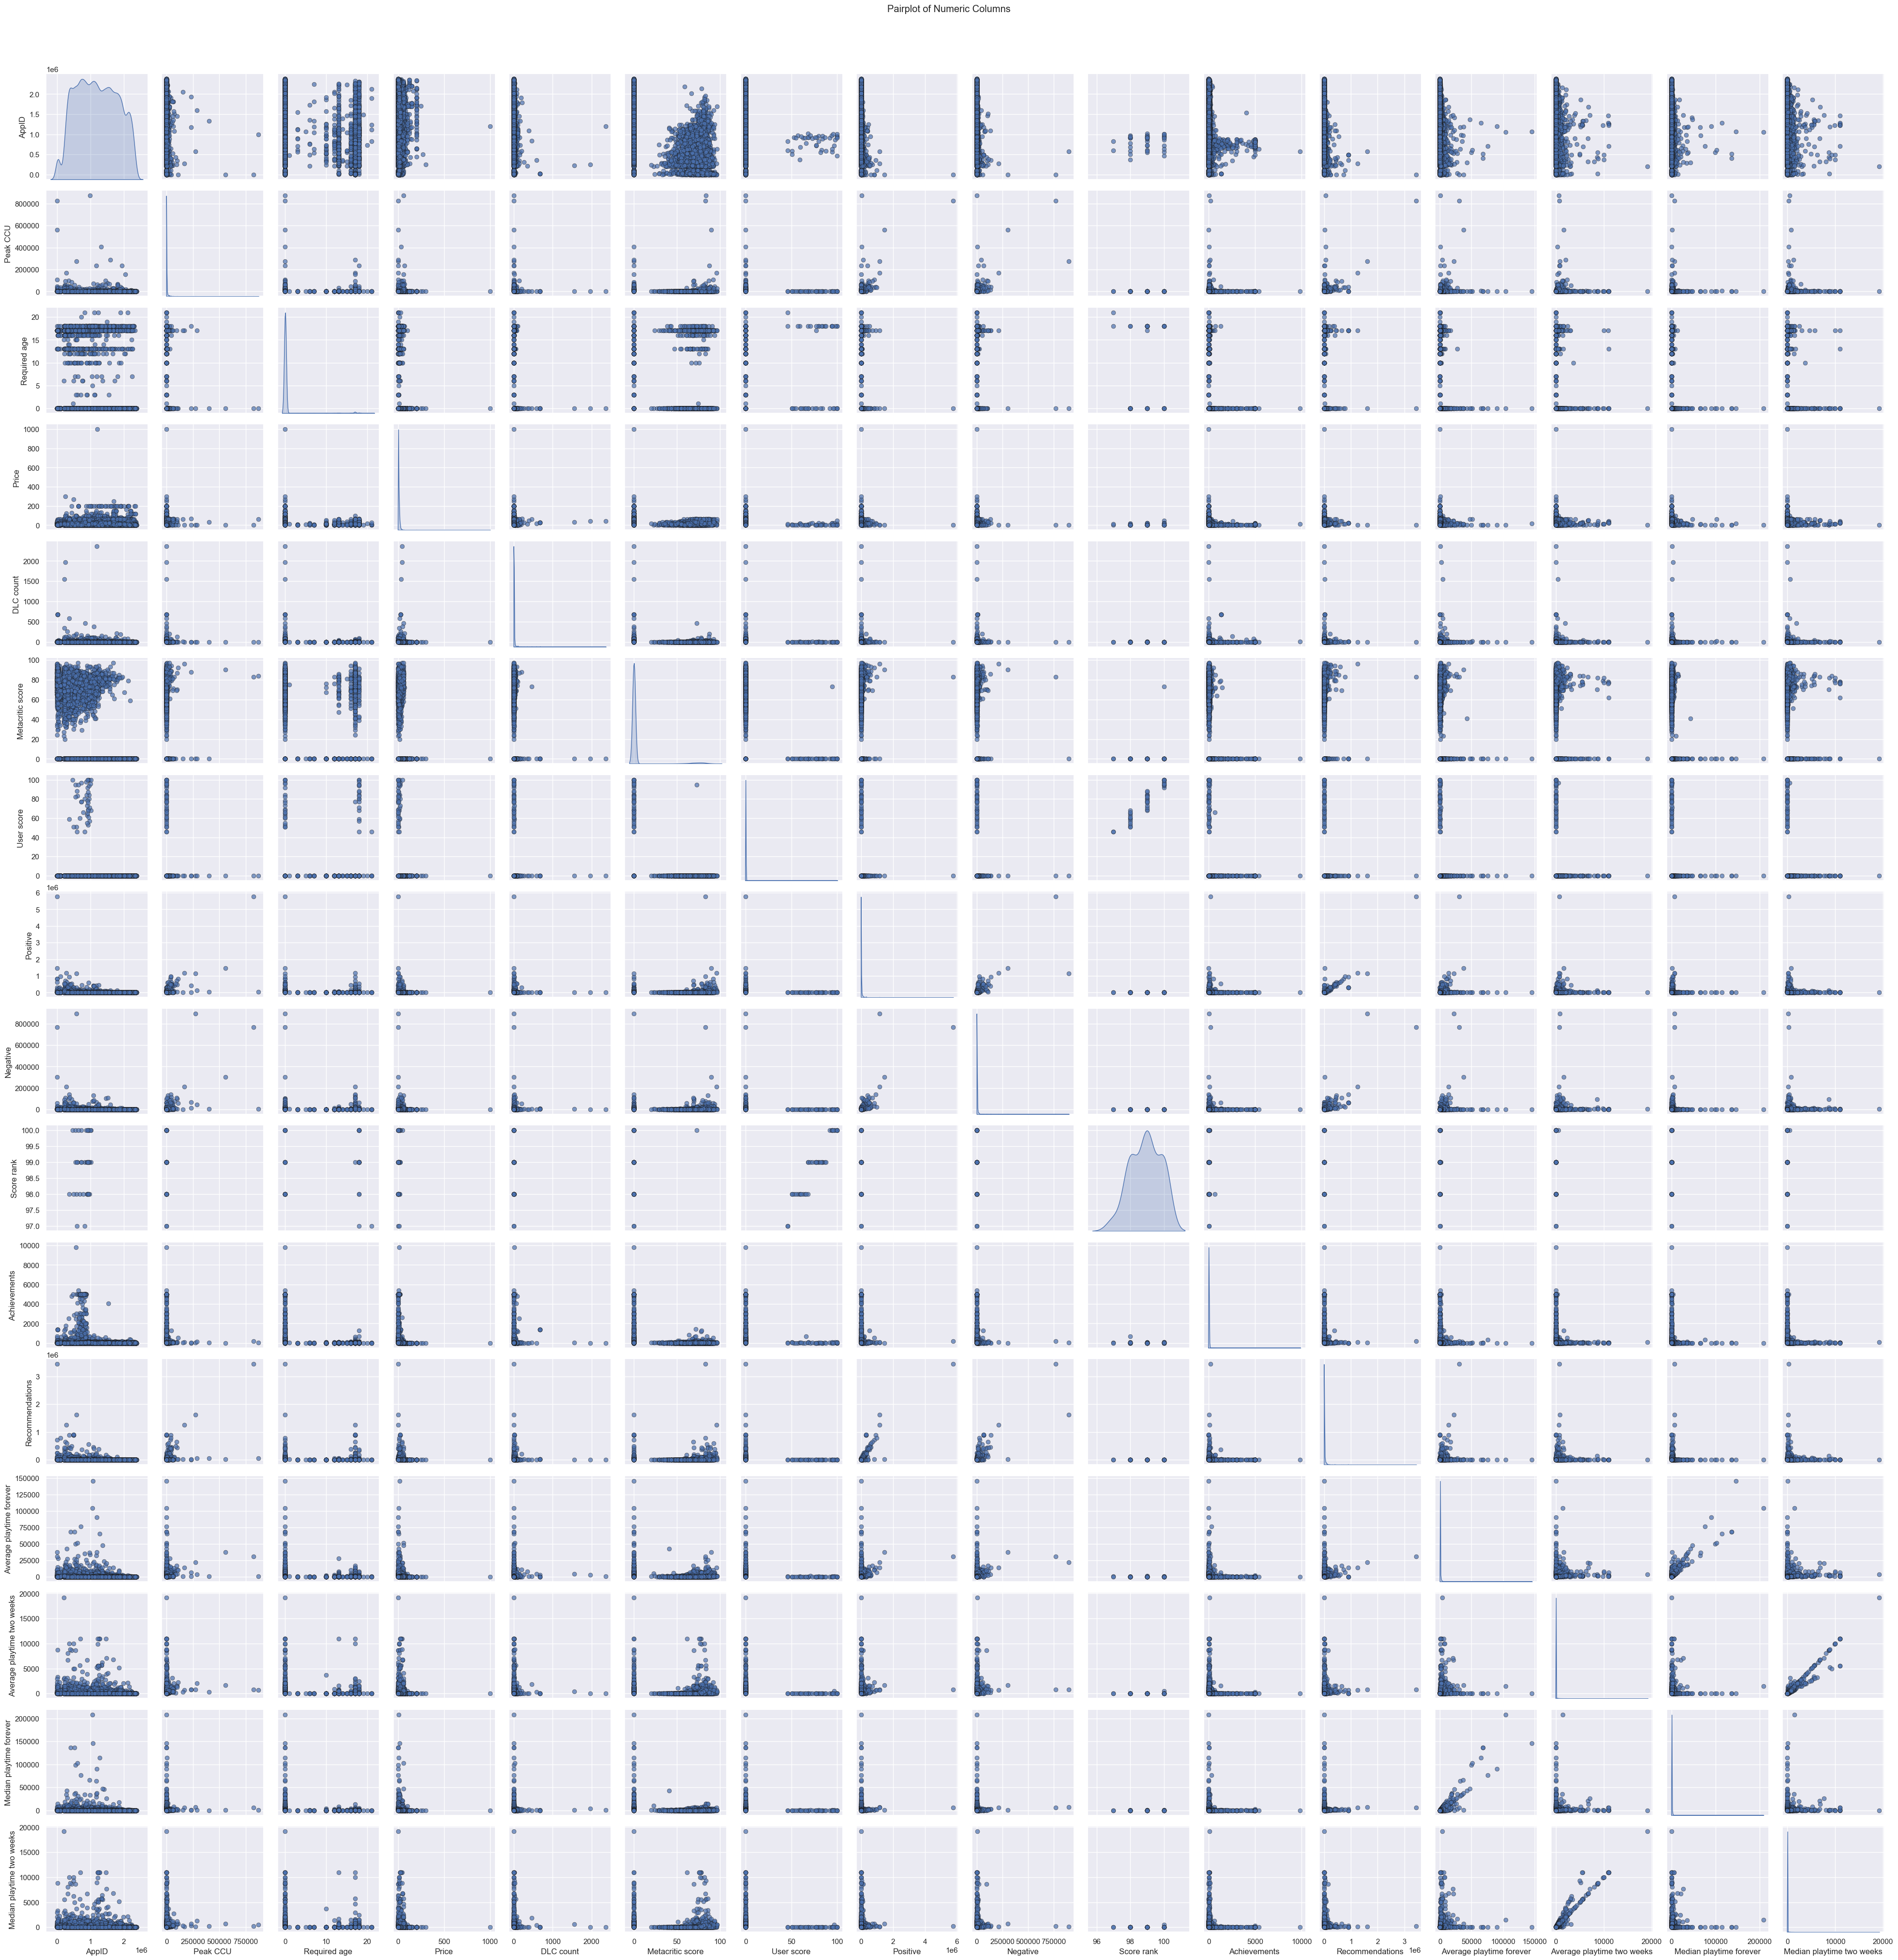

In [24]:
# Pairplot
plt.figure(figsize=(15, 10))
sns.pairplot(data[numeric_columns], diag_kind='kde', plot_kws={'alpha':0.7, 's':40, 'edgecolor':'k'}, palette='viridis')
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.show()